### Week 6 SciPy and Matlabplot Practice Problems (continued)

In [2]:
import numpy as np

### Problem 1
In this exercise, you will use SciPy's optimization to find the minimum of a given function. You'll learn how to import the necessary modules from SciPy, define a function to optimize, and use SciPy's minimize function to find the optimal solution.

1) Import the required module from SciPy for optimization.

2) Define the following quadratic function: $f(x) = 2x^2 + 4x - 6$


4) Use SciPy's optimization function to find the minimum of this function. ($x$ and $f(x)$). Note I have named a variable name `result`, you might want to use the same name.  


*Hint*: Use scipy's `optimize.minimize` function. See https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


In [63]:
from scipy import optimize

def f(x):
    return 2*x**2 + 4*x - 6

result = optimize.minimize(f,1)

def g(x):
    return x**4 - 4*x**2 + x

resultg = optimize.minimize(g, .126)
resultg

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.062748047376
        x: [ 1.260e-01]
      nit: 0
      jac: [ 1.446e-06]
 hess_inv: [[1]]
     nfev: 2
     njev: 1

In [49]:
print(f"Minimum found at x = {result.x[0]:.2f}, f(x) = {f(result.x[0]):.2f}")

Minimum found at x = -1.00, f(x) = -8.00


In [50]:
print(type(result))
print(type(result.x))
print(result)
print(f"Minimum found at x = {result.x[0]:.2f}, f(x) = {result.fun}")

<class 'scipy.optimize._optimize.OptimizeResult'>
<class 'numpy.ndarray'>
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -8.0
        x: [-1.000e+00]
      nit: 2
      jac: [ 1.192e-07]
 hess_inv: [[ 2.500e-01]]
     nfev: 6
     njev: 3
Minimum found at x = -1.00, f(x) = -8.0


### Problem 1.2
What if I want to keep x within the range of [0.5, 1.5]. Can you resolve the problem?

In [47]:
result = optimize.minimize(f, 1, bounds=((0.5,1.5),))
print(f"New Minimum found at x = {result.x[0]:.2f}, f(x) = {f(result.x[0]):.2f}")

New Minimum found at x = 0.50, f(x) = -3.50


### Problem 2 Matplotlib practice

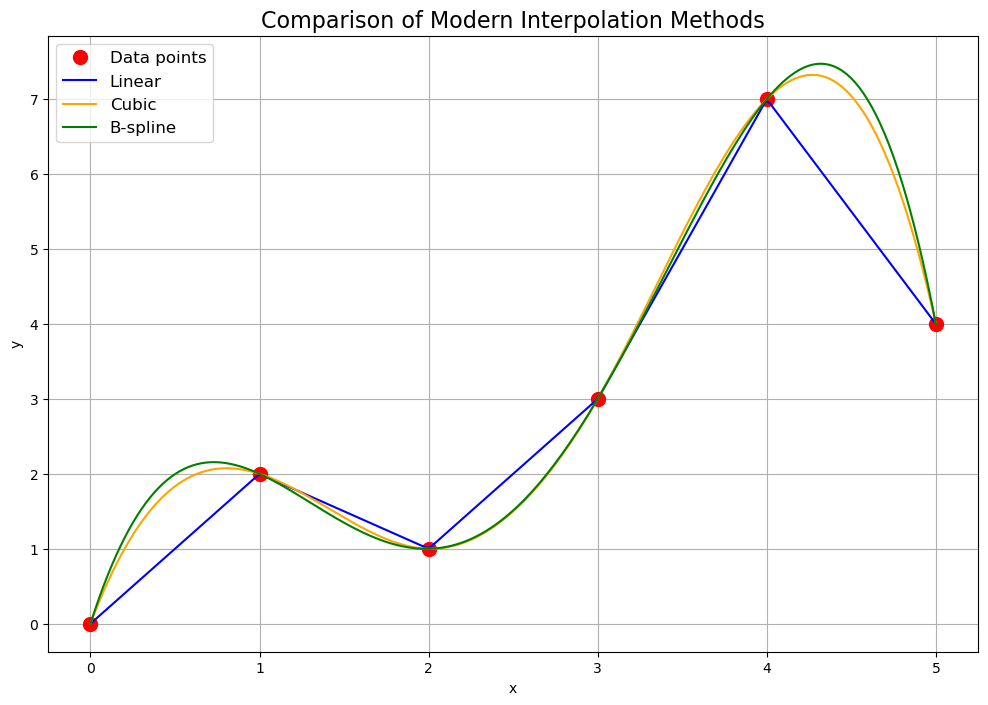

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, BSpline, make_interp_spline, interp1d

# Create sample data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 2, 1, 3, 7, 4])

# Create a finer x-axis for interpolation
x_new = np.linspace(0, 5, 200)

# Linear Interpolation (using interp1d for comparison, but note it's legacy)
f_linear = interp1d(x, y, kind='linear')
y_linear = f_linear(x_new)

# Cubic Spline (using CubicSpline)
cs = CubicSpline(x, y)
y_cubic = cs(x_new)

# B-Spline
bs = make_interp_spline(x, y, k=5)  # k=3 for cubic B-spline
y_bspline = bs(x_new)

# Create a plot with 
# 1) Linear Interpolation, Cubic Spline,  B-Spline
# 1) A title named Comparison of Modern Interpolation Methods, with fontsize=16
# 2) x-axis: x
# 3) y-axis: y
# 4) Add legend with fontsize=12
# 5) Add grid
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'ro', label='Data points', markersize=10)
plt.plot(x_new, f_linear(x_new), c='b', label='Linear')
plt.plot(x_new, cs(x_new), c='orange', label='Cubic')
plt.plot(x_new, bs(x_new), c='g', label='B-spline')
plt.title('Comparison of Modern Interpolation Methods', fontsize=16)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=12)
plt.grid(True)